# 1.0 - Data Exploration - Team 34
German Credit Risk Dataset - Initial Exploratory Data Analysis

This notebook performs initial data exploration using the cleaned dataset.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Import our custom modules
from fase2.config import INTERIM_DATA_DIR, FIGURES_DIR, TARGET_COL
from fase2.plots import (
    plot_target_distribution,
    plot_confusion_matrix,
)

# Configuración
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Imports successful")

2025-10-26 22:38:32.063 | INFO     | fase2.config:<module>:11 - PROJ_ROOT path is: /Users/alejandrodiazvillagomez/Desktop/Proyecto/Fase2


✓ Imports successful


## Load Cleaned Data

In [2]:
# Load the cleaned dataset
data_path = INTERIM_DATA_DIR / "german_credit_cleaned.csv"
df = pd.read_csv(data_path)

print(f"Dataset shape: {df.shape}")
print(f"\nFirst 5 rows:")
df.head()

Dataset shape: (846, 21)

First 5 rows:


,checking_account,duration,credit_history,purpose,amount,savings_account,employment_duration,installment_rate,personal_status,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,credit_risk
0,1.0,18.0,4.0,2.0,1049.0,1.0,2.0,4.0,2.0,1.0,...,2.0,21.0,3.0,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1,1.0,9.0,4.0,0.0,2799.0,1.0,3.0,2.0,3.0,1.0,...,1.0,36.0,3.0,1.0,2.0,3.0,1.0,1.0,2.0,1.0
2,2.0,12.0,2.0,9.0,841.0,2.0,4.0,2.0,2.0,1.0,...,1.0,23.0,3.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0
3,1.0,12.0,4.0,0.0,2122.0,1.0,3.0,3.0,3.0,1.0,...,1.0,39.0,3.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0
4,1.0,12.0,4.0,0.0,2171.0,1.0,3.0,4.0,3.0,1.0,...,2.0,38.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0


## Basic Statistics

In [3]:
print("=== DATASET OVERVIEW ===\n")
print(f"Total samples: {len(df)}")
print(f"Total features: {df.shape[1] - 1}")  # -1 for target
print(f"\nData types:\n{df.dtypes.value_counts()}")
print(f"\nMissing values:\n{df.isnull().sum().sum()}")

=== DATASET OVERVIEW ===

Total samples: 846
Total features: 20

Data types:
float64    21
Name: count, dtype: int64

Missing values:
0


In [4]:
# Summary statistics
df.describe()

,checking_account,duration,credit_history,purpose,amount,savings_account,employment_duration,installment_rate,personal_status,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,credit_risk
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,...,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,2.613475,95.670213,2.527187,2.832151,4321.022459,2.108747,3.321513,3.356974,2.691489,1.148936,...,2.374704,45.908983,2.696217,1.926714,4.522459,2.908983,1.843972,1.388889,1.964539,0.697400
std,1.255806,2000.744306,1.081788,2.708340,30549.304467,1.581698,1.189972,6.850059,0.713752,0.483128,...,1.052593,173.873279,0.690534,0.536762,34.199330,0.650891,0.363097,0.487786,0.185051,0.459655
min,1.000000,4.000000,0.000000,0.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.000000,1.000000,1386.500000,1.000000,3.000000,2.000000,2.000000,1.000000,...,1.000000,27.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.000000,2.000000,2325.500000,1.000000,3.000000,3.000000,3.000000,1.000000,...,2.000000,33.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.000000,3.000000,3972.750000,3.000000,4.000000,4.000000,3.000000,1.000000,...,3.000000,41.750000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,58140.000000,4.000000,10.000000,887992.000000,5.000000,5.000000,146.000000,4.000000,3.000000,...,4.000000,4606.000000,3.000000,3.000000,685.000000,4.000000,2.000000,2.000000,2.000000,1.000000


## Target Variable Distribution

In [5]:
# Using our custom plotting function
plot_target_distribution(df, save_path=FIGURES_DIR)

# Class distribution
print("\n=== TARGET DISTRIBUTION ===")
print(df[TARGET_COL].value_counts())
print(f"\nClass balance:")
print(df[TARGET_COL].value_counts(normalize=True) * 100)

2025-10-26 22:38:32.263 | INFO     | fase2.plots:plot_target_distribution:29 - Plotting target distribution for 'credit_risk'...
2025-10-26 22:38:32.466 | SUCCESS  | fase2.plots:plot_target_distribution:65 - ✓ Target distribution saved to: /Users/alejandrodiazvillagomez/Desktop/Proyecto/Fase2/reports/figures/target_distribution.png

=== TARGET DISTRIBUTION ===
credit_risk
1.0    590
0.0    256
Name: count, dtype: int64

Class balance:
credit_risk
1.0    69.739953
0.0    30.260047
Name: proportion, dtype: float64


## Feature Distributions

Numeric features: 20
['checking_account', 'duration', 'credit_history', 'purpose', 'amount', 'savings_account', 'employment_duration', 'installment_rate', 'personal_status', 'other_debtors']


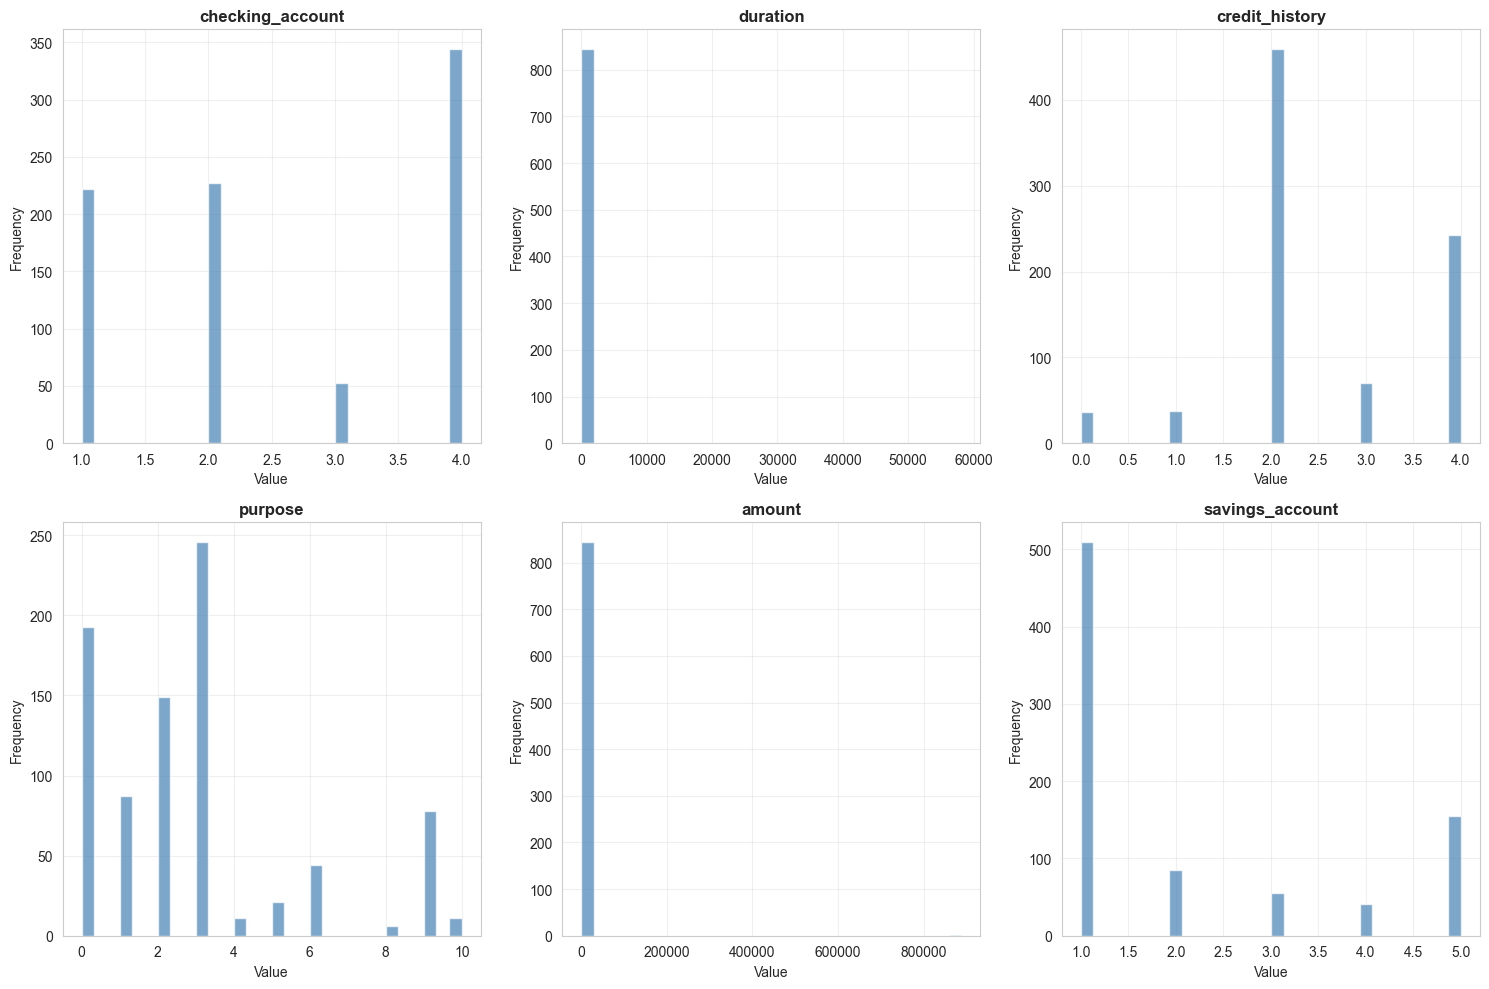

In [6]:
# Select numeric features for visualization
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove(TARGET_COL)

print(f"Numeric features: {len(numeric_features)}")
print(numeric_features[:10])  # Show first 10

# %%
# Plot distributions of first 6 numeric features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numeric_features[:6]):
    df[col].hist(bins=30, ax=axes[idx], color='steelblue', alpha=0.7)
    axes[idx].set_title(f'{col}', fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

## Correlation Analysis

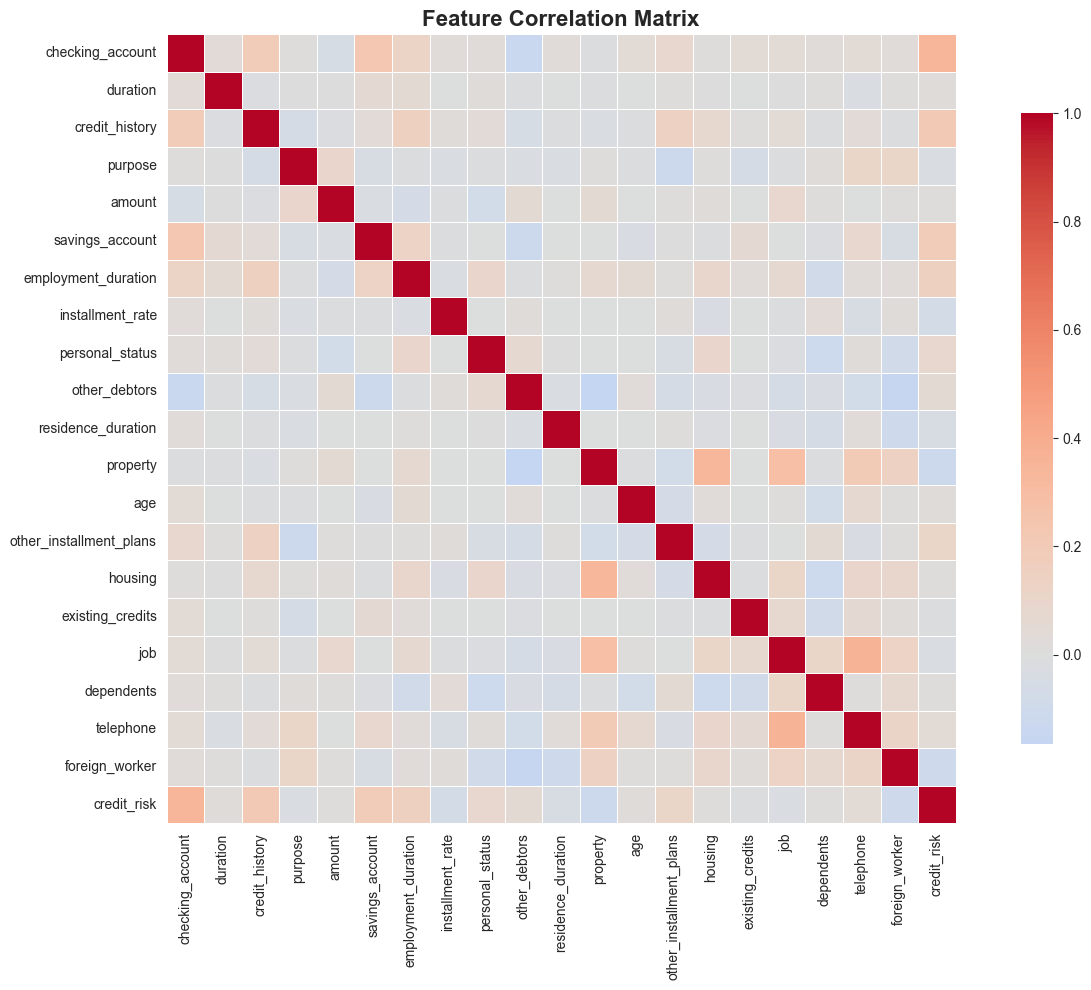

In [7]:
# Correlation matrix
correlation_matrix = df[numeric_features + [TARGET_COL]].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.savefig(FIGURES_DIR / 'correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
# Top correlations with target
target_correlations = correlation_matrix[TARGET_COL].sort_values(ascending=False)
print("=== TOP CORRELATIONS WITH TARGET ===\n")
print(target_correlations[1:11])  # Exclude self-correlation
print("✓ Exploration complete!")

=== TOP CORRELATIONS WITH TARGET ===

checking_account           0.352730
credit_history             0.221240
savings_account            0.193440
employment_duration        0.149952
other_installment_plans    0.108988
personal_status            0.086648
other_debtors              0.048642
telephone                  0.039879
duration                   0.023481
age                        0.021525
Name: credit_risk, dtype: float64
✓ Exploration complete!
